In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [27]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


C:\Users\user\AppData\Local\Temp\ipykernel_6436\1558527385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')  # x와 y 바꿈


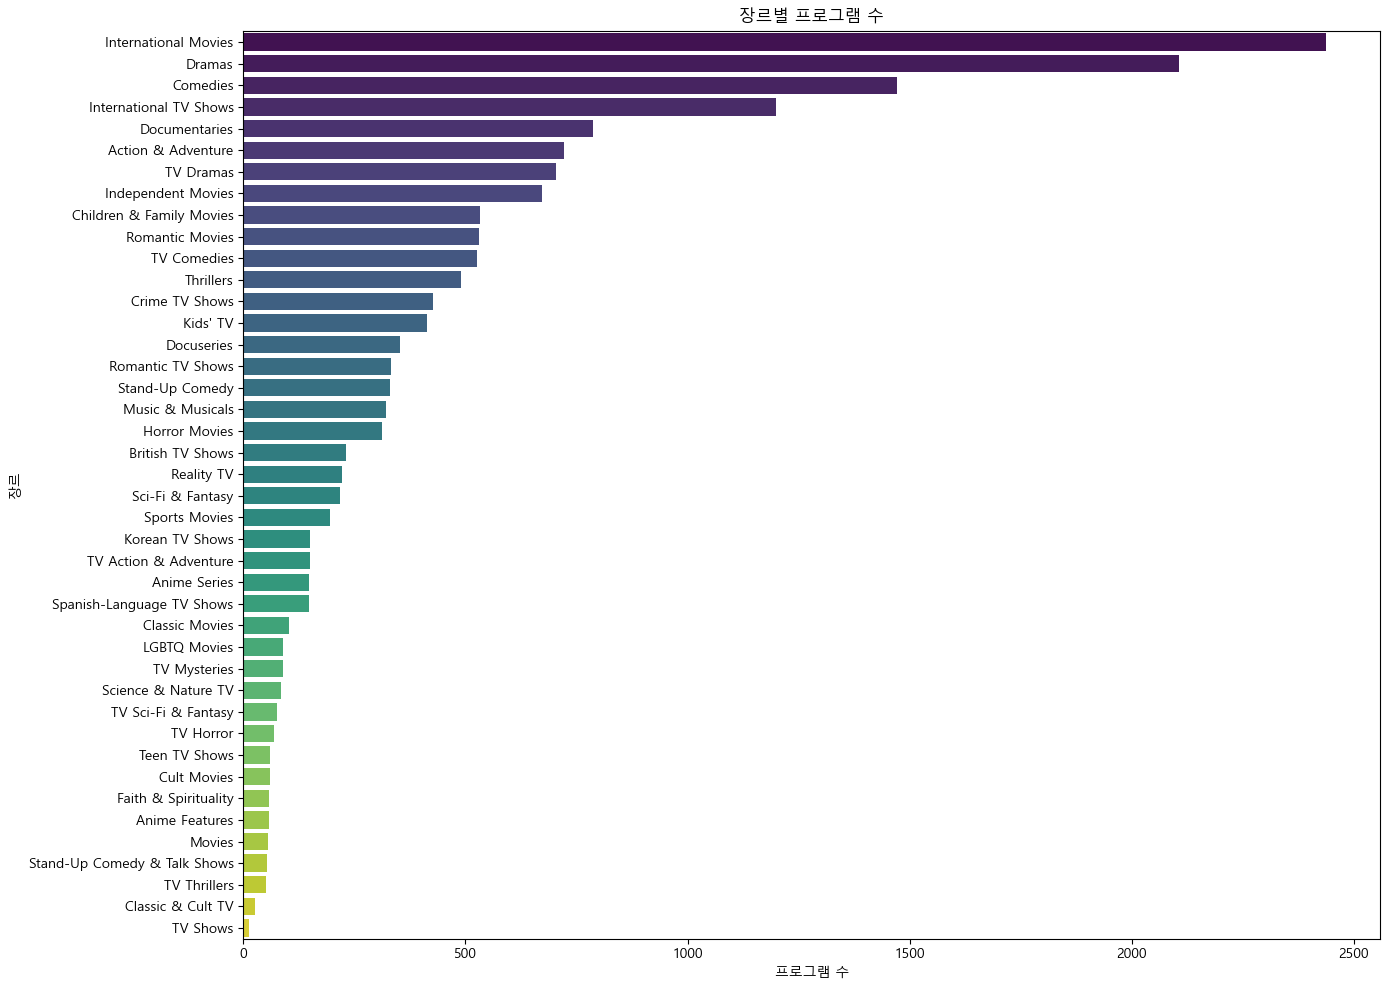

In [97]:
df = pd.read_csv('netflix_titles.csv')

# 장르별 프로그램 수 계산
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

# 시각화
plt.figure(figsize=(14, 10))  # 사이즈를 더 크게 설정
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')  # x와 y 바꿈
plt.ylabel('장르')  # y축 레이블
plt.xlabel('프로그램 수')  # x축 레이블
plt.title('장르별 프로그램 수')
plt.tight_layout()
plt.show()

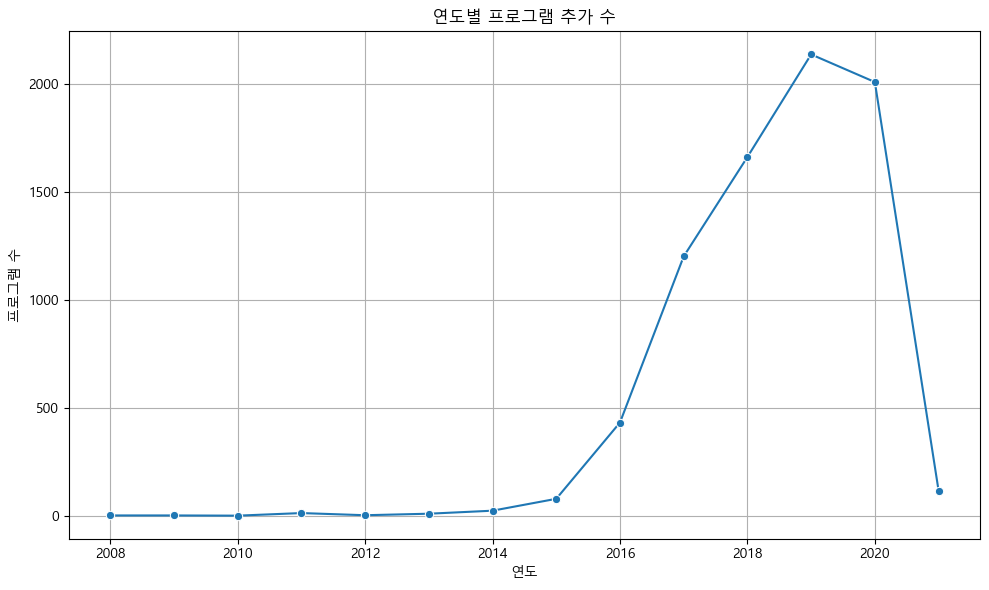

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('netflix_titles.csv')

# 날짜 형식 지정하여 변환
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

# 연도별 프로그램 추가 수 계산
yearly_counts = df['year_added'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.xlabel('연도')
plt.ylabel('프로그램 수')
plt.title('연도별 프로그램 추가 수')
plt.grid(True)
plt.tight_layout()
plt.show()


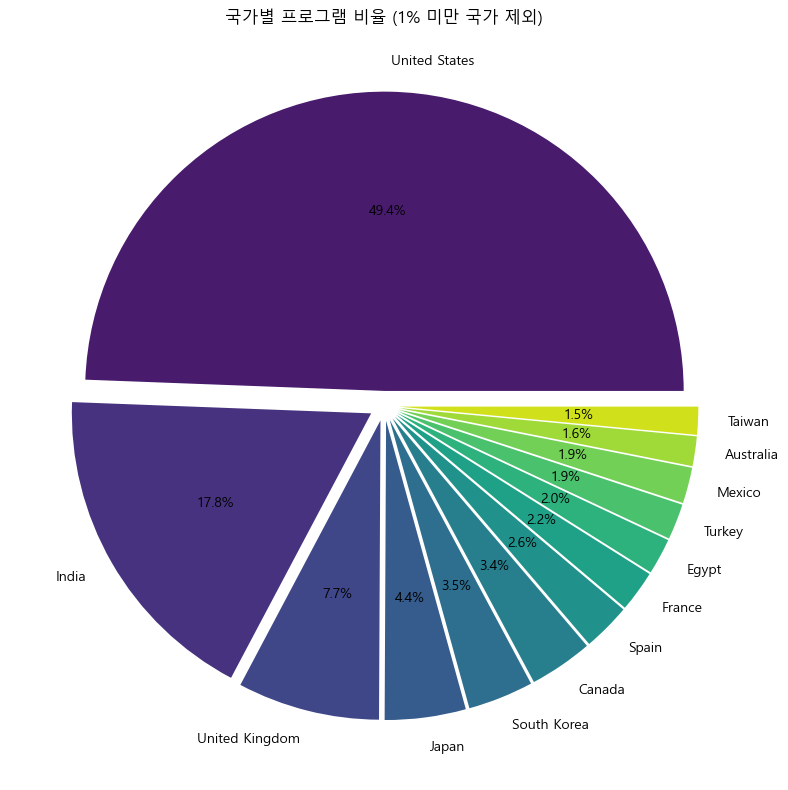

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('netflix_titles.csv')

# 국가별 프로그램 수 계산
country_counts = df['country'].value_counts()

# 상위 국가 선택
threshold = 0.01  # 1% 기준
total_programs = country_counts.sum()
top_countries = country_counts[country_counts / total_programs >= threshold]  # 1% 이상 국가


# 파이 차트 시각화
plt.figure(figsize=(10, 8))
explode = [0.05] * len(top_20_countries)  # 모든 파이 조각을 약간씩 분리
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_countries)), explode=explode)
plt.title('국가별 프로그램 비율 (1% 미만 국가 제외)')
plt.tight_layout()
plt.show()


<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_6436\2247905963.py:14: SyntaxWarning: invalid escape sequence '\d'
  df_filtered['duration'] = df_filtered['duration'].str.extract('(\d+)').astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_6436\2247905963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['duration'] = df_filtered['duration'].str.extract('(\d+)').astype(float)


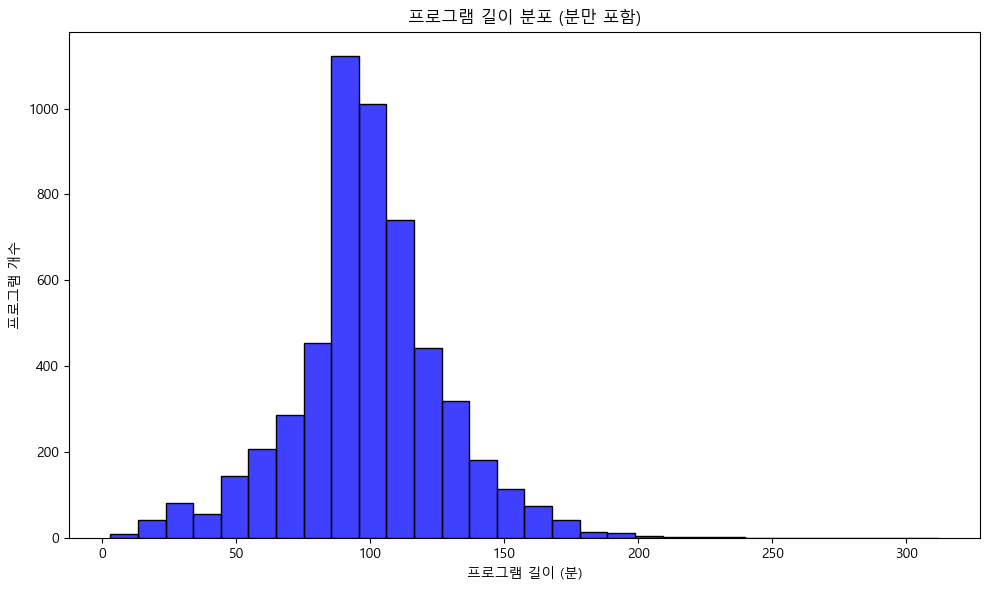

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')

# 'duration' 열에서 숫자와 'min'을 포함하는 데이터만 선택
df['duration'] = df['duration'].astype(str)

# 'min'이 포함된 값만 필터링
df_filtered = df[df['duration'].str.contains('min', na=False)]

# 'min'과 숫자만 추출하여 길이로 변환
df_filtered['duration'] = df_filtered['duration'].str.extract('(\d+)').astype(float)

# 히스토그램으로 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['duration'], bins=30, color='blue')
plt.xlabel('프로그램 길이 (분)')
plt.ylabel('프로그램 개수')
plt.title('프로그램 길이 분포 (분만 포함)')
plt.tight_layout()
plt.show()